# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [6]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


In [5]:
! conda install -y tqdm
#! conda install -y matplotlib==2.2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/ubuntu/anaconda3/envs/tensorflow_p36

  added / updated specs: 
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.4.16          |           py36_0         142 KB

The following NEW packages will be INSTALLED:

    tqdm:            4.23.0-py36_0               

The following packages will be UPDATED:

    ca-certificates: 2018.1.18-0      conda-forge --> 2018.03.07-0     
    certifi:         2018.1.18-py36_0 conda-forge --> 2018.4.16-py36_0 
    openssl:         1.0.2n-0         conda-forge --> 1.0.2o-h20670df_0


certifi 2018.4.16: ##################################################### | 100% 
Preparing transaction: done


In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install Image
#!{sys.executable} -m pip install tests


    100% |████████████████████████████████| 7.1MB 202kB/s eta 0:00:01
    100% |████████████████████████████████| 2.0MB 722kB/s eta 0:00:01
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


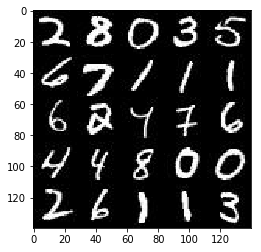

In [7]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

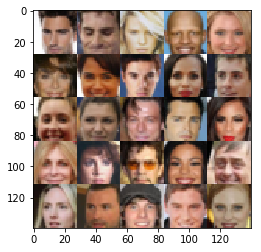

In [8]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [10]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [11]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Udacity Reviewer Feedback: Function Discriminator

This is an essential part of getting good results. I see you used batch normalization and maximum with alpha value to help your model.

Just a question, do you think applying dropout to your layers also would make a difference here?
I, personally, strongly suggest using dropout. It's not always necessary, but it's a good experiment if you are not satisfied with your results.

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [12]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_dim
        
        out = tf.tanh(logits)
        
    return out    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Udacity Reviewer Feedback: Function Generator

There is a suggestion to maintain the loss of the generator lower than the loss of the discriminator. This goal is tough to obtain, but you can test by (example) applying dropout to the discriminator and not on the generator. This type of actions might help on creating similar robust models, but one of them has a small disadvantage on learning.

### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [13]:
def model_loss(input_real, input_z, out_channel_dim, alpha = 0.9):
    
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * alpha))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss   


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Udacity Reviewer Feedback: Function model_loss



Good work! I see that you applied an alpha to "smooth" labels, that is a great technique to help your model generalize!


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Update weights and biases
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize Model
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
class GAN:
    def __init__(self, data_shape, z_dim, learning_rate, beta1=0.5):
        self.input_real, self.input_z,self.learning_rate = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
        self.d_loss, self.g_loss = model_loss(self.input_real, self.input_z, data_shape[3])
        self.d_opt, self.g_opt = model_opt(self.d_loss, self.g_loss, learning_rate, beta1)

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,print_every=10,show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    net=GAN(data_shape,z_dim,learning_rate, beta1=beta1)
    saver = tf.train.Saver()
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for steps,batch_images in enumerate(get_batches(batch_size)):
                # TODO: Train Model
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: (batch_images*2.0), net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_real: (batch_images*2.0), net.input_z: batch_z})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: (batch_images*2)})
                    train_loss_g = net.g_loss.eval({net.input_real: (batch_images*2.0), net.input_z: batch_z})
 
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
            
                if steps % show_every == 0:
                    show_generator_output(sess=sess,
                                          image_mode=data_image_mode,
                                          input_z=net.input_z,
                                         n_images=10,
                                             out_channel_dim=data_shape[3])
    #plot losses
    fig,ax=pyplot.subplots()
    losses=np.array(losses)
    pyplot.plot(losses.T[0],label='Discriminator')
    pyplot.plot(losses.T[1],label='Generator')
    pyplot.legend()

### Udacity Reviewer Feedback: Function Train

* It should build the model using `model_inputs`, `model_loss`, and `model_opt`.  
* It should show output of the `generator` using the `show_generator_output` function

Nice touch by creating a GAN class! This surely helps for code use and replication.

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.9642... Generator Loss: 0.0175


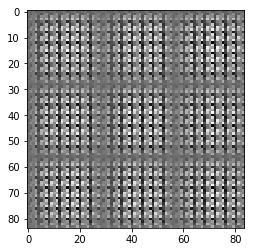

Epoch 1/2... Discriminator Loss: 0.6204... Generator Loss: 2.3484
Epoch 1/2... Discriminator Loss: 0.3784... Generator Loss: 4.5326
Epoch 1/2... Discriminator Loss: 3.2302... Generator Loss: 8.7433
Epoch 1/2... Discriminator Loss: 1.0113... Generator Loss: 1.5374
Epoch 1/2... Discriminator Loss: 0.4971... Generator Loss: 2.6023
Epoch 1/2... Discriminator Loss: 0.5212... Generator Loss: 3.3788
Epoch 1/2... Discriminator Loss: 1.7282... Generator Loss: 0.3741
Epoch 1/2... Discriminator Loss: 0.8986... Generator Loss: 1.9520
Epoch 1/2... Discriminator Loss: 0.8093... Generator Loss: 1.4940
Epoch 1/2... Discriminator Loss: 1.1786... Generator Loss: 0.7859


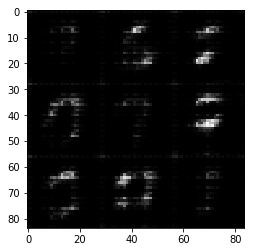

Epoch 1/2... Discriminator Loss: 1.3858... Generator Loss: 0.6116
Epoch 1/2... Discriminator Loss: 1.4549... Generator Loss: 0.5156
Epoch 1/2... Discriminator Loss: 1.4591... Generator Loss: 0.5079
Epoch 1/2... Discriminator Loss: 1.3088... Generator Loss: 1.6348
Epoch 1/2... Discriminator Loss: 1.0463... Generator Loss: 0.9065
Epoch 1/2... Discriminator Loss: 1.2939... Generator Loss: 0.6977
Epoch 1/2... Discriminator Loss: 1.2201... Generator Loss: 1.6302
Epoch 1/2... Discriminator Loss: 2.1516... Generator Loss: 2.7998
Epoch 1/2... Discriminator Loss: 1.3190... Generator Loss: 0.6222
Epoch 1/2... Discriminator Loss: 1.0732... Generator Loss: 1.4598


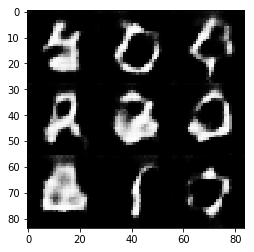

Epoch 1/2... Discriminator Loss: 1.0313... Generator Loss: 1.1905
Epoch 1/2... Discriminator Loss: 1.1385... Generator Loss: 0.8919
Epoch 1/2... Discriminator Loss: 1.1290... Generator Loss: 1.1666
Epoch 1/2... Discriminator Loss: 1.3258... Generator Loss: 0.6276
Epoch 1/2... Discriminator Loss: 1.0713... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 1.1169... Generator Loss: 0.9788
Epoch 1/2... Discriminator Loss: 1.4754... Generator Loss: 2.0201
Epoch 1/2... Discriminator Loss: 1.2509... Generator Loss: 0.7305
Epoch 1/2... Discriminator Loss: 1.2856... Generator Loss: 0.6501
Epoch 1/2... Discriminator Loss: 1.6352... Generator Loss: 0.4026


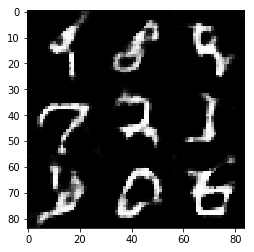

Epoch 1/2... Discriminator Loss: 1.1131... Generator Loss: 1.0418
Epoch 1/2... Discriminator Loss: 1.7394... Generator Loss: 0.3598
Epoch 1/2... Discriminator Loss: 1.0870... Generator Loss: 1.1584
Epoch 1/2... Discriminator Loss: 1.0920... Generator Loss: 1.5672
Epoch 1/2... Discriminator Loss: 1.0429... Generator Loss: 1.0637
Epoch 1/2... Discriminator Loss: 1.1406... Generator Loss: 0.9912
Epoch 1/2... Discriminator Loss: 1.5682... Generator Loss: 0.4316
Epoch 1/2... Discriminator Loss: 1.1687... Generator Loss: 0.9356
Epoch 1/2... Discriminator Loss: 1.2228... Generator Loss: 0.7799
Epoch 1/2... Discriminator Loss: 1.1890... Generator Loss: 0.9923


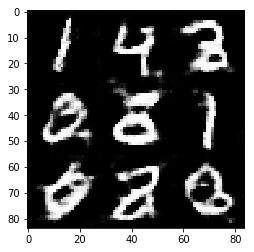

Epoch 1/2... Discriminator Loss: 1.2160... Generator Loss: 1.1636
Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 1.0092
Epoch 1/2... Discriminator Loss: 1.2212... Generator Loss: 1.2042
Epoch 1/2... Discriminator Loss: 1.1506... Generator Loss: 0.8151
Epoch 1/2... Discriminator Loss: 1.1923... Generator Loss: 0.8025
Epoch 1/2... Discriminator Loss: 1.2946... Generator Loss: 1.6341
Epoch 2/2... Discriminator Loss: 1.0832... Generator Loss: 1.2864


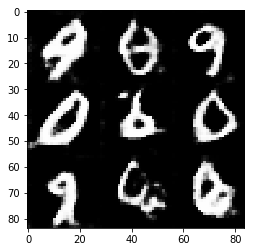

Epoch 2/2... Discriminator Loss: 1.1581... Generator Loss: 0.9868
Epoch 2/2... Discriminator Loss: 1.2546... Generator Loss: 1.1637
Epoch 2/2... Discriminator Loss: 1.2204... Generator Loss: 1.5263
Epoch 2/2... Discriminator Loss: 1.1925... Generator Loss: 1.5811
Epoch 2/2... Discriminator Loss: 1.1444... Generator Loss: 1.0724
Epoch 2/2... Discriminator Loss: 1.1332... Generator Loss: 0.8584
Epoch 2/2... Discriminator Loss: 1.2060... Generator Loss: 1.1676
Epoch 2/2... Discriminator Loss: 1.7250... Generator Loss: 0.3603
Epoch 2/2... Discriminator Loss: 1.2027... Generator Loss: 1.1806
Epoch 2/2... Discriminator Loss: 1.2716... Generator Loss: 1.8894


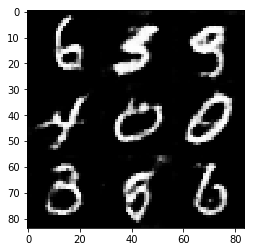

Epoch 2/2... Discriminator Loss: 1.1133... Generator Loss: 1.2560
Epoch 2/2... Discriminator Loss: 1.3079... Generator Loss: 0.7526
Epoch 2/2... Discriminator Loss: 1.3414... Generator Loss: 0.6616
Epoch 2/2... Discriminator Loss: 1.5474... Generator Loss: 0.4429
Epoch 2/2... Discriminator Loss: 1.2813... Generator Loss: 1.2195
Epoch 2/2... Discriminator Loss: 1.1057... Generator Loss: 1.1362
Epoch 2/2... Discriminator Loss: 1.1044... Generator Loss: 0.8312
Epoch 2/2... Discriminator Loss: 1.2949... Generator Loss: 1.6899
Epoch 2/2... Discriminator Loss: 1.1103... Generator Loss: 1.6609
Epoch 2/2... Discriminator Loss: 1.4732... Generator Loss: 0.4952


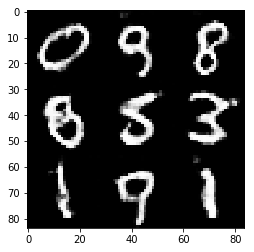

Epoch 2/2... Discriminator Loss: 1.2876... Generator Loss: 0.6012
Epoch 2/2... Discriminator Loss: 1.3092... Generator Loss: 0.6555
Epoch 2/2... Discriminator Loss: 1.0176... Generator Loss: 1.0314
Epoch 2/2... Discriminator Loss: 1.4828... Generator Loss: 0.5072
Epoch 2/2... Discriminator Loss: 1.1824... Generator Loss: 0.7416
Epoch 2/2... Discriminator Loss: 1.1649... Generator Loss: 0.8051
Epoch 2/2... Discriminator Loss: 1.2089... Generator Loss: 0.9879
Epoch 2/2... Discriminator Loss: 1.5429... Generator Loss: 0.4791
Epoch 2/2... Discriminator Loss: 1.0330... Generator Loss: 1.2056
Epoch 2/2... Discriminator Loss: 1.3508... Generator Loss: 2.0519


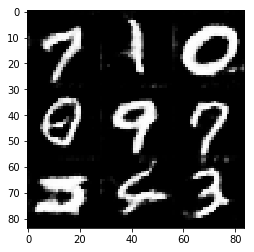

Epoch 2/2... Discriminator Loss: 1.5494... Generator Loss: 0.4175
Epoch 2/2... Discriminator Loss: 1.4465... Generator Loss: 0.4909
Epoch 2/2... Discriminator Loss: 1.5795... Generator Loss: 1.9962
Epoch 2/2... Discriminator Loss: 1.4724... Generator Loss: 0.4969
Epoch 2/2... Discriminator Loss: 1.2380... Generator Loss: 0.7430
Epoch 2/2... Discriminator Loss: 1.1181... Generator Loss: 1.1496
Epoch 2/2... Discriminator Loss: 1.2050... Generator Loss: 0.7148
Epoch 2/2... Discriminator Loss: 1.3009... Generator Loss: 1.4057
Epoch 2/2... Discriminator Loss: 1.6740... Generator Loss: 0.3940
Epoch 2/2... Discriminator Loss: 1.0951... Generator Loss: 1.0028


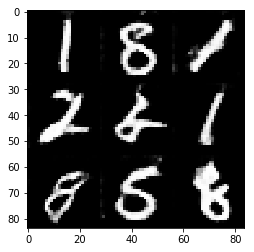

Epoch 2/2... Discriminator Loss: 1.5317... Generator Loss: 0.4826
Epoch 2/2... Discriminator Loss: 1.2865... Generator Loss: 1.6305
Epoch 2/2... Discriminator Loss: 1.2215... Generator Loss: 0.9268
Epoch 2/2... Discriminator Loss: 1.4061... Generator Loss: 1.4051
Epoch 2/2... Discriminator Loss: 1.3603... Generator Loss: 1.1184
Epoch 2/2... Discriminator Loss: 1.2042... Generator Loss: 1.1869


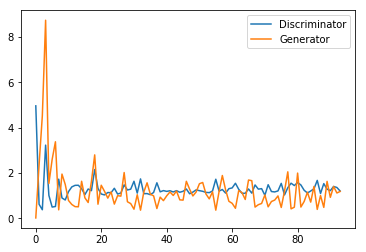

In [22]:
batch_size = 128
z_dim = 100
learning_rate = 0.002  
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 17.5886... Generator Loss: 0.0000


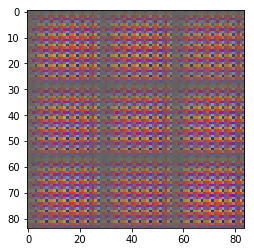

Epoch 1/1... Discriminator Loss: 4.2491... Generator Loss: 18.5089
Epoch 1/1... Discriminator Loss: 0.6054... Generator Loss: 3.3174
Epoch 1/1... Discriminator Loss: 1.0355... Generator Loss: 1.2524
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 1.1268
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 1.8113
Epoch 1/1... Discriminator Loss: 1.9645... Generator Loss: 0.2895
Epoch 1/1... Discriminator Loss: 0.7821... Generator Loss: 1.4226
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 1.1831
Epoch 1/1... Discriminator Loss: 0.9400... Generator Loss: 1.2895
Epoch 1/1... Discriminator Loss: 0.9677... Generator Loss: 2.7123


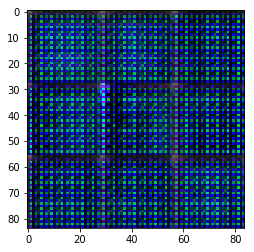

Epoch 1/1... Discriminator Loss: 0.6796... Generator Loss: 1.9516
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 0.8748... Generator Loss: 1.0467
Epoch 1/1... Discriminator Loss: 2.1714... Generator Loss: 2.7215
Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 1.7723
Epoch 1/1... Discriminator Loss: 0.8862... Generator Loss: 1.6888
Epoch 1/1... Discriminator Loss: 1.0429... Generator Loss: 1.5260
Epoch 1/1... Discriminator Loss: 1.6036... Generator Loss: 0.4761
Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 0.9586
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.8890


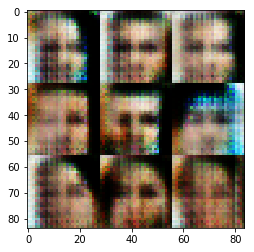

Epoch 1/1... Discriminator Loss: 0.5126... Generator Loss: 2.2475
Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 1.7139
Epoch 1/1... Discriminator Loss: 0.7986... Generator Loss: 1.5067
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 1.0647
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.9091
Epoch 1/1... Discriminator Loss: 1.0330... Generator Loss: 0.9600
Epoch 1/1... Discriminator Loss: 0.8352... Generator Loss: 3.2161
Epoch 1/1... Discriminator Loss: 0.7581... Generator Loss: 1.2812
Epoch 1/1... Discriminator Loss: 0.9057... Generator Loss: 2.1068
Epoch 1/1... Discriminator Loss: 0.9306... Generator Loss: 1.1550


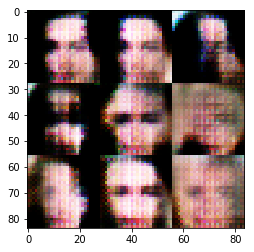

Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 1.1315
Epoch 1/1... Discriminator Loss: 1.0545... Generator Loss: 0.8208
Epoch 1/1... Discriminator Loss: 1.0690... Generator Loss: 1.1840
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 3.0419
Epoch 1/1... Discriminator Loss: 1.0528... Generator Loss: 0.8474
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 1.8790
Epoch 1/1... Discriminator Loss: 0.8619... Generator Loss: 1.1783
Epoch 1/1... Discriminator Loss: 0.9005... Generator Loss: 1.0281
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 0.8802
Epoch 1/1... Discriminator Loss: 0.7136... Generator Loss: 1.4462


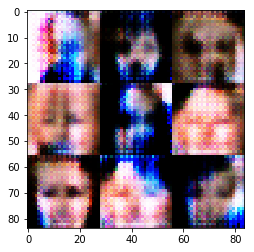

Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 1.1298
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 0.9220... Generator Loss: 1.5133
Epoch 1/1... Discriminator Loss: 0.6868... Generator Loss: 2.2411
Epoch 1/1... Discriminator Loss: 1.0350... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 0.9525
Epoch 1/1... Discriminator Loss: 0.9624... Generator Loss: 0.8673
Epoch 1/1... Discriminator Loss: 0.9909... Generator Loss: 1.5719
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.5580
Epoch 1/1... Discriminator Loss: 0.9328... Generator Loss: 1.4208


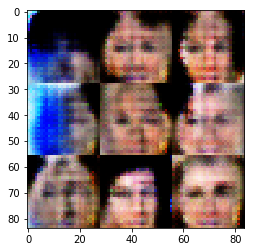

Epoch 1/1... Discriminator Loss: 1.1026... Generator Loss: 1.4701
Epoch 1/1... Discriminator Loss: 0.9230... Generator Loss: 0.9781
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 1.8065
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.0934... Generator Loss: 1.1078
Epoch 1/1... Discriminator Loss: 0.9420... Generator Loss: 1.7749
Epoch 1/1... Discriminator Loss: 1.0509... Generator Loss: 1.2562
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 1.2341
Epoch 1/1... Discriminator Loss: 1.9367... Generator Loss: 0.3306


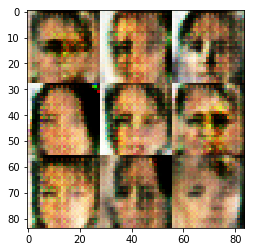

Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 0.7471
Epoch 1/1... Discriminator Loss: 0.5233... Generator Loss: 1.9938
Epoch 1/1... Discriminator Loss: 1.0123... Generator Loss: 1.0743
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 0.4821
Epoch 1/1... Discriminator Loss: 1.0300... Generator Loss: 0.8429
Epoch 1/1... Discriminator Loss: 1.5865... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 0.7778... Generator Loss: 1.4160
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.7249


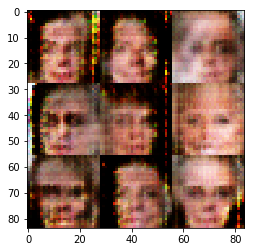

Epoch 1/1... Discriminator Loss: 0.8065... Generator Loss: 1.1473
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 0.8648... Generator Loss: 1.0917
Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 1.1049
Epoch 1/1... Discriminator Loss: 1.1845... Generator Loss: 1.1248
Epoch 1/1... Discriminator Loss: 1.7350... Generator Loss: 2.5021
Epoch 1/1... Discriminator Loss: 0.6002... Generator Loss: 2.2019
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 2.0145
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 1.2498
Epoch 1/1... Discriminator Loss: 1.1110... Generator Loss: 0.7388


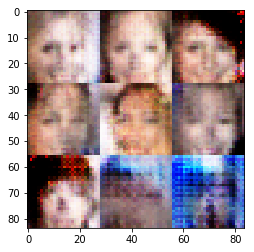

Epoch 1/1... Discriminator Loss: 1.1272... Generator Loss: 0.8963
Epoch 1/1... Discriminator Loss: 0.8952... Generator Loss: 1.4052
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 1.4796... Generator Loss: 0.4773
Epoch 1/1... Discriminator Loss: 0.9708... Generator Loss: 1.0192
Epoch 1/1... Discriminator Loss: 0.8627... Generator Loss: 1.2087
Epoch 1/1... Discriminator Loss: 2.0044... Generator Loss: 4.1106
Epoch 1/1... Discriminator Loss: 0.8257... Generator Loss: 2.4487
Epoch 1/1... Discriminator Loss: 1.4875... Generator Loss: 0.5703
Epoch 1/1... Discriminator Loss: 1.1811... Generator Loss: 1.1801


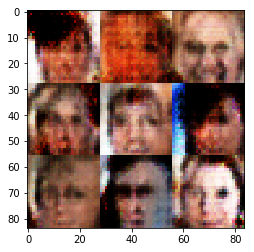

Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 1.4754
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 0.9690... Generator Loss: 1.1132
Epoch 1/1... Discriminator Loss: 0.8765... Generator Loss: 1.1484
Epoch 1/1... Discriminator Loss: 0.9065... Generator Loss: 1.2905
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 1.4550... Generator Loss: 1.0928
Epoch 1/1... Discriminator Loss: 0.6873... Generator Loss: 1.7587
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.5557


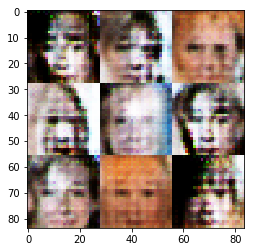

Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 1.1946
Epoch 1/1... Discriminator Loss: 0.7616... Generator Loss: 1.2445
Epoch 1/1... Discriminator Loss: 1.2570... Generator Loss: 0.7211
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.9877... Generator Loss: 1.0120
Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 0.8854... Generator Loss: 1.0872
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 1.1177
Epoch 1/1... Discriminator Loss: 1.0923... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.0292... Generator Loss: 0.9173


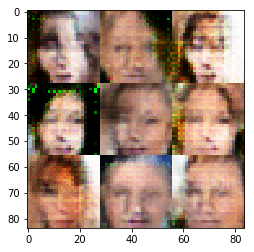

Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 1.1820
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 1.7142
Epoch 1/1... Discriminator Loss: 1.1102... Generator Loss: 1.2563
Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 1.0800
Epoch 1/1... Discriminator Loss: 0.9128... Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 1.0124
Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 1.3400
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 1.2118
Epoch 1/1... Discriminator Loss: 0.9798... Generator Loss: 1.1424


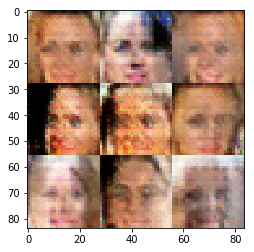

Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 1.5823
Epoch 1/1... Discriminator Loss: 1.1591... Generator Loss: 0.9579
Epoch 1/1... Discriminator Loss: 1.1555... Generator Loss: 2.2568
Epoch 1/1... Discriminator Loss: 1.4764... Generator Loss: 1.5941
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 2.2347
Epoch 1/1... Discriminator Loss: 1.1218... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 2.6818... Generator Loss: 3.3662
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 1.2583
Epoch 1/1... Discriminator Loss: 1.2578... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.7675


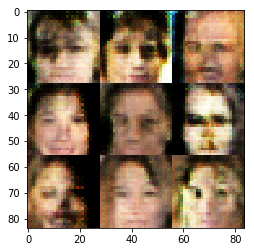

Epoch 1/1... Discriminator Loss: 0.9526... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 1.1033
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 1.6687
Epoch 1/1... Discriminator Loss: 1.5541... Generator Loss: 0.4913
Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.1351... Generator Loss: 1.4451
Epoch 1/1... Discriminator Loss: 0.8825... Generator Loss: 1.3821
Epoch 1/1... Discriminator Loss: 0.8874... Generator Loss: 1.5147
Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 1.0800
Epoch 1/1... Discriminator Loss: 0.9762... Generator Loss: 1.6220


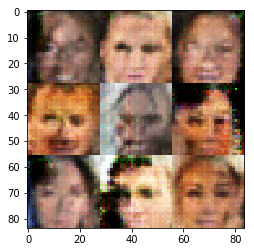

Epoch 1/1... Discriminator Loss: 0.7902... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 1.1156... Generator Loss: 0.9339
Epoch 1/1... Discriminator Loss: 1.0226... Generator Loss: 1.2560
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.0252... Generator Loss: 1.5049
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 1.4819
Epoch 1/1... Discriminator Loss: 0.9801... Generator Loss: 1.7589
Epoch 1/1... Discriminator Loss: 1.2333... Generator Loss: 1.9972
Epoch 1/1... Discriminator Loss: 1.0648... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 0.9106... Generator Loss: 1.3226


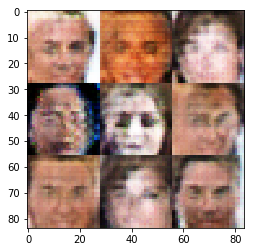

Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 1.3877
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.1331
Epoch 1/1... Discriminator Loss: 1.2052... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 0.9355... Generator Loss: 1.1685
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 1.8394
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 1.9115
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 1.1867
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.6550


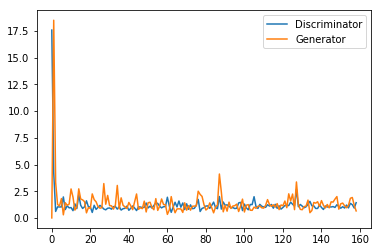

In [23]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Udacity Reviewer Feedback: Parameters



About your comment on the `z_dim`, it's tricky to find an optimal number.
The latent variables (`z_dim`) define how many random numbers will be generated to "feed" the generator model for each of the images. From this numbers, the model will try to "fake" a real example to fool the discriminator.
From intuition, we can see that a big number of these is good for higher detailed images, but you will also need a more powerful model.

There has been some research on that as you can see here some examples:
https://jhui.github.io/2017/03/05/Generative-adversarial-models/
http://www.inference.vc/instance-noise-a-trick-for-stabilising-gan-training/
https://blog.openai.com/generative-models/

These are very technical whitepapers and might take some time to fully grasp.
Personally, your chosen number (`100`) is fine mostly because your model is capable of reaching its goal of generating images of 28x28 that resemble faces.

I hope this answers your question. Great work! Keep asking, never stop learning!


### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

In [25]:
! pip list


DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
absl-py (0.1.13)
asn1crypto (0.24.0)
astor (0.6.2)
autovizwidget (0.12.5)
backcall (0.1.0)
bleach (1.5.0)
bokeh (0.12.15)
boto3 (1.7.2)
botocore (1.10.2)
certifi (2018.4.16)
cffi (1.11.5)
chardet (3.0.4)
cryptography (2.2.1)
cycler (0.10.0)
decorator (4.2.1)
Django (2.0.4)
docutils (0.14)
entrypoints (0.2.3)
environment-kernels (1.1.1)
gast (0.2.0)
grpcio (1.11.0)
h5py (2.7.1)
hdijupyterutils (0.12.5)
html5lib (0.9999999)
idna (2.6)
image (1.5.20)
ipykernel (4.8.2)
ipython (6.3.1)
ipython-genutils (0.2.0)
ipywidgets (7.2.0)
jedi (0.11.1)
Jinja2 (2.10)
jmespath (0.9.3)
jsonschema (2.6.0)
jupyter-client (5.2.3)
jupyter-core (4.4.0)
Keras (2.1.5)
kiwisolver (1.0.1)
Markdown (2.6.11)
MarkupSafe (1.0)
matplotlib (2.2.2)
mistune (0.8.3)
mkl-fft (1.0.0)
mkl-random (1.0.1)
nb-conda (2

In [24]:
print("Python Version:\n")
! python --version

Python Version:

Python 3.6.4 :: Anaconda, Inc.
